In [6]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv('/content/drive/MyDrive/Data Analytics/cancer data.csv')

In [8]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


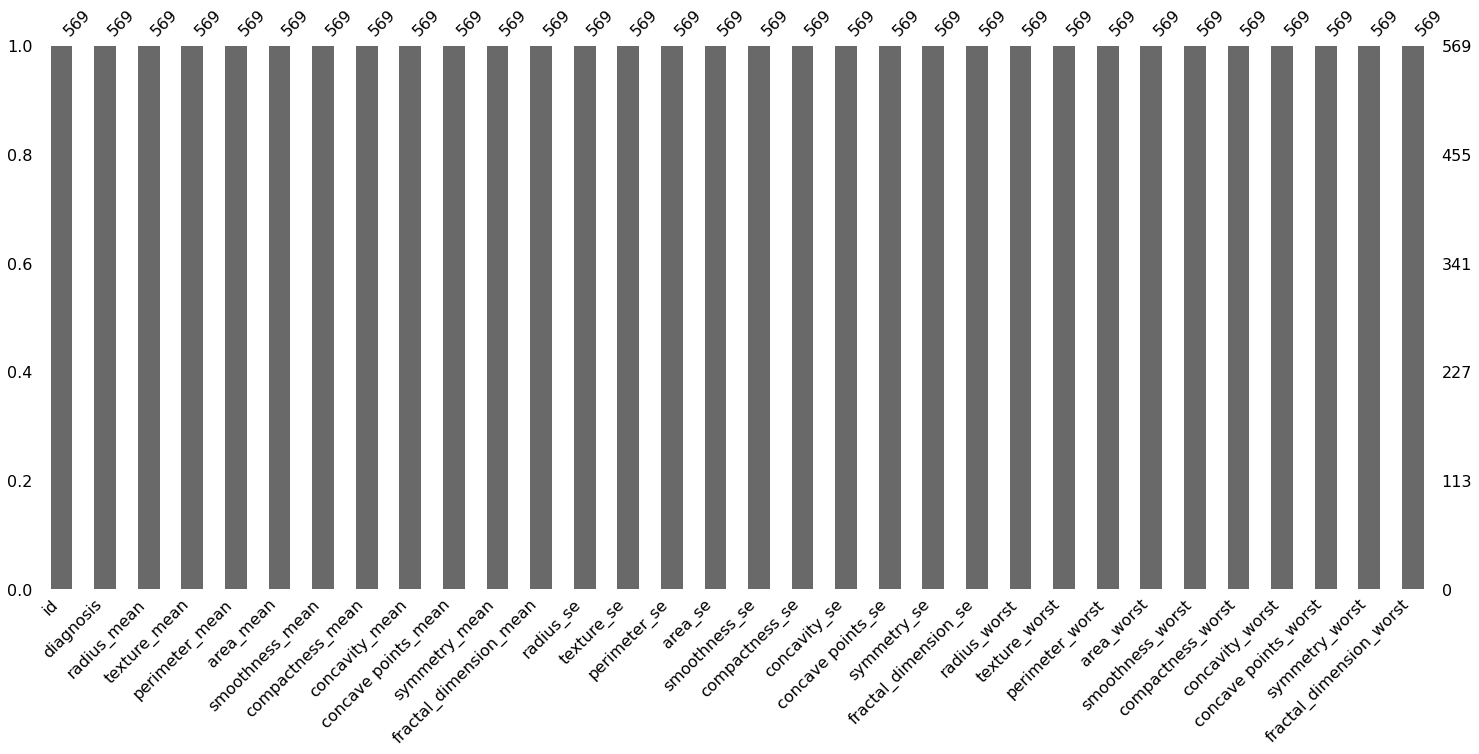

In [9]:
import missingno as mn
mn.bar(df)

In [10]:
X=df.iloc[:,2:]
Y=df.iloc[:,1]

In [11]:
import scipy.stats as stats
X_scaled=X.apply(stats.zscore)
X_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [12]:
X_scaled=X_scaled.T

In [13]:
#implementing PCA
cov_matrix=np.cov(X_scaled)

In [14]:
eigen_val,eigen_vector=np.linalg.eigh(cov_matrix)
sorted_index = np.argsort(eigen_val)[::-1]
sorted_eigenval = eigen_val[sorted_index]
sorted_eigenvector = eigen_vector[:,sorted_index]

In [15]:
sum=0
conf_per=85
count=0
for i in sorted_eigenval:
  sum+=(i/np.sum(sorted_eigenval))*100
  if(sum<conf_per):
    count+=1
  else:
    break

In [16]:
eig_vector_subset=sorted_eigenvector[:,0:count]
eig_vector_subset

array([[-0.21890244,  0.23385713,  0.00853124, -0.04140896,  0.03778635],
       [-0.10372458,  0.05970609, -0.0645499 ,  0.60305   , -0.04946885],
       [-0.22753729,  0.21518136,  0.00931422, -0.0419831 ,  0.03737466],
       [-0.22099499,  0.23107671, -0.02869953, -0.0534338 ,  0.01033125],
       [-0.14258969, -0.18611302,  0.1042919 , -0.15938277, -0.36508853],
       [-0.23928535, -0.15189161,  0.07409157, -0.03179458,  0.01170397],
       [-0.25840048, -0.06016536, -0.00273384, -0.01912275,  0.08637541],
       [-0.26085376,  0.0347675 ,  0.02556354, -0.06533594, -0.04386103],
       [-0.13816696, -0.19034877,  0.04023994, -0.06712498, -0.30594143],
       [-0.06436335, -0.36657547,  0.02257409, -0.04858676, -0.04442436],
       [-0.20597878,  0.10555215, -0.26848139, -0.09794124, -0.1544565 ],
       [-0.01742803, -0.08997968, -0.37463367,  0.35985553, -0.19165051],
       [-0.21132592,  0.08945723, -0.26664537, -0.08899241, -0.12099022],
       [-0.20286964,  0.15229263, -0.2

In [17]:
X_reduced=(X_scaled.T.dot(eig_vector_subset))
X_new=pd.DataFrame(X_reduced)
X_new

,0,1,2,3,4
0,-9.192837,-1.948583,1.123166,-3.633731,-1.195110
1,-2.387802,3.768172,0.529293,-1.118264,0.621775
2,-5.733896,1.075174,0.551748,-0.912083,-0.177086
3,-7.122953,-10.275589,3.232790,-0.152547,-2.960878
4,-3.935302,1.948072,-1.389767,-2.940639,0.546747
...,...,...,...,...,...
564,-6.439315,3.576817,-2.459487,-1.177314,-0.074824
565,-3.793382,3.584048,-2.088476,2.506028,-0.510723
566,-1.256179,1.902297,-0.562731,2.089227,1.809991
567,-10.374794,-1.672010,1.877029,2.356031,-0.033742


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.30, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_predicted=lr.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(Y_test,Y_predicted)
print(conf_matrix)

[[107   1]
 [  1  62]]


In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy = accuracy_score(Y_test,Y_predicted)
precision = precision_score(Y_test,Y_predicted,average='micro')
recall =  recall_score(Y_test,Y_predicted,average='micro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall:  {recall}')

accuracy: 0.9883040935672515
precision: 0.9883040935672515
recall:  0.9883040935672515
